In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
df=pd.read_csv('pune house data.csv')

In [3]:
# Checking the dataset
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


Data Understanding and Preprocessing Approach:

The dataset consists of 9 columns in total.

The availability column will be categorized into two classes: Ready to Move and Not Ready.

In the Size column, textual elements like "BHK" and "Bedroom" will be removed, retaining only the numeric value.

For this analysis, the area_type and society columns will be dropped, although they may be explored in future iterations.

The site_location column will be encoded, as locality is likely to influence property prices. We will also experiment with models both including and excluding this feature to assess its impact.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
# Dropping the columns
df.drop(['area_type', 'society'], axis=1, inplace=True)

In [6]:
df.head()

,availability,size,total_sqft,bath,balcony,price,site_location
0,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [7]:
# Replacing all date entries in the 'availability' column with 'Not Ready'
df['availability']=df['availability'].where(df['availability']== 'Ready To Move', 'Not Ready')

In [8]:
df['availability']

0            Not Ready
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318        Not Ready
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [9]:
# Handling the 'Size' column:
# - Removing text like 'BHK', 'Bedroom', etc.
# - If the value contains 'HK', we treat it as 1 room and add 1 to the numeric part
# - If the value is 'RK', we do not add any extra room
def extract_bhk(value):
    val = str(value).lower().replace(" ", "")

    if 'rk' in val:
        match = pd.Series(val).str.extract(r'(\d+)')[0]
        return int(match[0]) if pd.notnull(match[0]) else None

    elif 'bhk' in val or 'bedroom' in val:
        match = pd.Series(val).str.extract(r'(\d+)')[0]
        return int(match[0]) + 1 if pd.notnull(match[0]) else None

    return None

# Applying the function
df['No. of Rooms'] = df['size'].apply(extract_bhk)

print(df)

        availability       size total_sqft  bath  balcony   price  \
0          Not Ready      2 BHK       1056   2.0      1.0   39.07   
1      Ready To Move  4 Bedroom       2600   5.0      3.0  120.00   
2      Ready To Move      3 BHK       1440   2.0      3.0   62.00   
3      Ready To Move      3 BHK       1521   3.0      1.0   95.00   
4      Ready To Move      2 BHK       1200   2.0      1.0   51.00   
...              ...        ...        ...   ...      ...     ...   
13315  Ready To Move  5 Bedroom       3453   4.0      0.0  231.00   
13316  Ready To Move      4 BHK       3600   5.0      NaN  400.00   
13317  Ready To Move      2 BHK       1141   2.0      1.0   60.00   
13318      Not Ready      4 BHK       4689   4.0      1.0  488.00   
13319  Ready To Move      1 BHK        550   1.0      1.0   17.00   

              site_location  No. of Rooms  
0               Alandi Road           3.0  
1           Ambegaon Budruk           5.0  
2                Anandnagar           4

In [10]:
# Dropping Size Column
df.drop(['size'], axis=1, inplace=True)

In [11]:
df.head()

,availability,total_sqft,bath,balcony,price,site_location,No. of Rooms
0,Not Ready,1056,2.0,1.0,39.07,Alandi Road,3.0
1,Ready To Move,2600,5.0,3.0,120.00,Ambegaon Budruk,5.0
2,Ready To Move,1440,2.0,3.0,62.00,Anandnagar,4.0
3,Ready To Move,1521,3.0,1.0,95.00,Aundh,4.0
4,Ready To Move,1200,2.0,1.0,51.00,Aundh Road,3.0


In [12]:
# Dropping Null Values from the columns  "Bath" and "No. of rooms"
df = df.dropna(subset=['No. of Rooms', 'bath'])

In [13]:
# Handling inconsistent formats in the 'total_sqft' column:
# Some entries are ranges (e.g., '1200-1500'). We'll convert these to their average values.
def parse_average(val):
    try:
        val = str(val)
        if '-' in val:
            # It's a range: take the average
            nums = [int(x.strip()) for x in val.split('-')]
            return sum(nums) / 2
        else:
            # Try to extract a single number
            num = ''.join(c for c in val if c.isdigit())
            return int(num) if num else None
    except:
        return None

df['sqft'] = df['total_sqft'].apply(parse_average)

print(df)

        availability total_sqft  bath  balcony   price         site_location  \
0          Not Ready       1056   2.0      1.0   39.07           Alandi Road   
1      Ready To Move       2600   5.0      3.0  120.00       Ambegaon Budruk   
2      Ready To Move       1440   2.0      3.0   62.00            Anandnagar   
3      Ready To Move       1521   3.0      1.0   95.00                 Aundh   
4      Ready To Move       1200   2.0      1.0   51.00            Aundh Road   
...              ...        ...   ...      ...     ...                   ...   
13315  Ready To Move       3453   4.0      0.0  231.00                Pashan   
13316  Ready To Move       3600   5.0      NaN  400.00             Paud Road   
13317  Ready To Move       1141   2.0      1.0   60.00              Pirangut   
13318      Not Ready       4689   4.0      1.0  488.00          Prabhat Road   
13319  Ready To Move        550   1.0      1.0   17.00  Pune Railway Station   

       No. of Rooms    sqft  
0        

In [14]:
# Dropping the original 'total_sqft' column after processing and storing the cleaned values separately
df.drop(['total_sqft'], axis=1, inplace=True)

In [15]:
df.head()

,availability,bath,balcony,price,site_location,No. of Rooms,sqft
0,Not Ready,2.0,1.0,39.07,Alandi Road,3.0,1056.0
1,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,5.0,2600.0
2,Ready To Move,2.0,3.0,62.00,Anandnagar,4.0,1440.0
3,Ready To Move,3.0,1.0,95.00,Aundh,4.0,1521.0
4,Ready To Move,2.0,1.0,51.00,Aundh Road,3.0,1200.0


In [16]:
# Creating dummy variables for the 'site_location' column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['site_location'])

In [17]:
df_encoded

,availability,bath,balcony,price,No. of Rooms,sqft,site_location_Alandi Road,site_location_Ambegaon Budruk,site_location_Anandnagar,site_location_Aundh,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,Not Ready,2.0,1.0,39.07,3.0,1056.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ready To Move,5.0,3.0,120.00,5.0,2600.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Ready To Move,2.0,3.0,62.00,4.0,1440.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Ready To Move,3.0,1.0,95.00,4.0,1521.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Ready To Move,2.0,1.0,51.00,3.0,1200.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,4.0,0.0,231.00,6.0,3453.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13316,Ready To Move,5.0,NaN,400.00,5.0,3600.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,Ready To Move,2.0,1.0,60.00,3.0,1141.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,Not Ready,4.0,1.0,488.00,5.0,4689.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


array([[<Axes: >],
       [<Axes: >],
       [<Axes: >],
       [<Axes: >],
       [<Axes: >]], dtype=object)

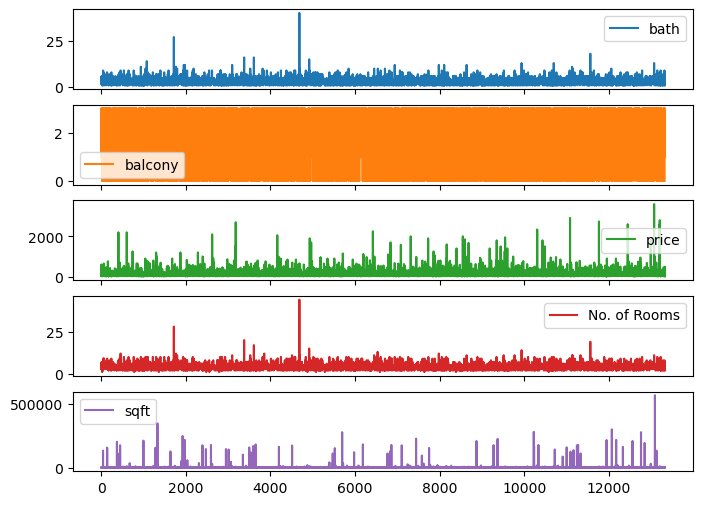

In [18]:
# Plotting separate line plots for 'bath', 'balcony', 'price', 'No. of Rooms', and 'sqft' to observe their patterns and distributions
import seaborn as sns
df_encoded[['bath', 'balcony', 'price','No. of Rooms','sqft']].plot(subplots=True, layout=(5, 1), figsize=(8, 6))

In [19]:
# Replacing blanks and NA
df_encoded['balcony'] = df_encoded['balcony'].replace(["", None], 0).fillna(0)
df_encoded['sqft'].replace('', np.nan, inplace=True)
df_encoded.dropna(subset=['sqft'], inplace=True)

In [20]:
# Removing Outliers using Z-Score
from scipy.stats import zscore
print(f"Original rows: {df.shape[0]}")
numeric_cols = ['bath', 'balcony', 'price','No. of Rooms','sqft']
z_scores = df_encoded[numeric_cols].apply(zscore)
print(z_scores.head())
df_filtered = df_encoded[(z_scores.abs() < 2.5).all(axis=1)]
df_filtered = df_filtered.reset_index(drop=True)

Original rows: 13247
       bath   balcony     price  No. of Rooms      sqft
0 -0.516245 -0.606042 -0.491810     -0.617263 -0.103220
1  1.720066  1.722143  0.051073      0.924177  0.015599
2 -0.516245  1.722143 -0.337995      0.153457 -0.073669
3  0.229192 -0.606042 -0.116629      0.153457 -0.067436
4 -0.516245 -0.606042 -0.411783     -0.617263 -0.092139


In [21]:
df_filtered['availability'] = df['availability'].replace({'Ready To Move': 2, 'Not Ready': 1})
df_filtered


,availability,bath,balcony,price,No. of Rooms,sqft,site_location_Alandi Road,site_location_Ambegaon Budruk,site_location_Anandnagar,site_location_Aundh,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,1.0,2.0,1.0,39.07,3.0,1056.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,5.0,3.0,120.00,5.0,2600.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2.0,3.0,62.00,4.0,1440.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,3.0,1.0,95.00,4.0,1521.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,1.0,51.00,3.0,1200.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,2.0,3.0,3.0,112.00,4.0,1715.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12624,2.0,4.0,0.0,231.00,6.0,3453.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12625,2.0,5.0,0.0,400.00,5.0,3600.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12626,2.0,2.0,1.0,60.00,3.0,1141.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Checking the correlation between numerical features in the dataset (rounded to 2 decimal places)
(df_filtered.select_dtypes(include='number').corr().round(2))

,availability,bath,balcony,price,No. of Rooms,sqft
availability,1.00,0.00,-0.01,0.00,0.00,0.01
bath,0.00,1.00,0.15,0.64,0.85,0.42
balcony,-0.01,0.15,1.00,0.07,0.15,0.08
price,0.00,0.64,0.07,1.00,0.57,0.51
No. of Rooms,0.00,0.85,0.15,0.57,1.00,0.36
sqft,0.01,0.42,0.08,0.51,0.36,1.00


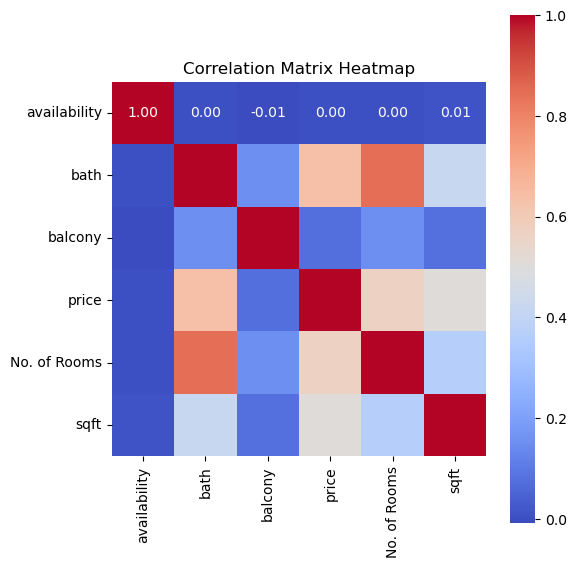

In [23]:
#visualize the correlation matrix using a heatmap for better interpretability
import matplotlib.pyplot as plt
corr_matrix = df_filtered.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [24]:
# Importing necessary libraries for building and evaluating the price prediction model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

In [25]:
df_filtered['availability'].fillna(1, inplace=True)

In [26]:
# Defining feature set (X) and target variable (y), followed by splitting the data into training and testing sets
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Features (X_train):", X_train.shape)

Training Features (X_train): (10102, 102)


In [27]:
# Defining a dictionary of 4 different machine learning models to compare performance:
# Linear Regression, Random Forest, XGBoost, and Support Vector Regressor (SVR)
# Training and evaluating each of the 4 ML models defined above.
# For each model, we compute performance metrics: RMSE, MAE, and R² score,
# and store the results for comparison.
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "SVR": SVR()
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append([name, rmse, mae, r2])


In [28]:
# Printing Results
result_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
print(result_df.sort_values(by="RMSE"))

               Model       RMSE        MAE  R² Score
2            XGBoost  47.377899  28.446892  0.641279
1      Random Forest  47.488344  28.408474  0.639604
3                SVR  54.265523  30.948462  0.529398
0  Linear Regression  57.498663  35.711185  0.471651


In [29]:
# Performing 5-fold cross-validation using R² as the evaluation metric
# Printing individual fold scores and the mean R² score for overall model performance
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² scores: {scores}")
print(f"Mean R²: {np.mean(scores):.4f}")

R² scores: [0.56654301 0.52845608 0.51184421 0.57094211 0.50228663]
Mean R²: 0.5360


               Model       RMSE        MAE  R² Score
0  Linear Regression  57.498663  35.711185  0.471651
1      Random Forest  47.488344  28.408474  0.639604
2            XGBoost  47.377899  28.446892  0.641279
3                SVR  54.265523  30.948462  0.529398


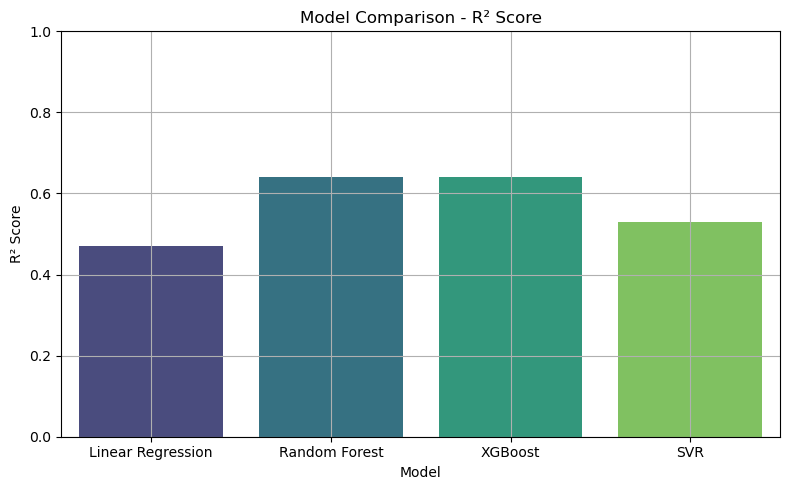

In [35]:
# Converting results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R² Score'])
print(results_df)

# Plotting R² Scores of all models using a bar chart to visualize and compare their predictive performance.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()